<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> [pour Statistique et Science des Données](https://github.com/wikistat/Intro-Python)

# Apprentissage Statistique / Machine avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 150px; display: inline" alt="Python"/></a> & <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 180px; display: inline" alt="Scikit-Learn"/></a>
**Résumé**: Ce calepin introduit l'utilisation de la librairie `scikit-learn` pour la modélisation et l'apprentissage. Pourquoi utiliser `scikit-learn` ? Ou non ? Liste des fonctionnalités, quelques exemples de mise en oeuvre de modélisation ([régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [$k$-plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf), [arbres de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf), [forêts aléatoires](http://wikistat.fr/pdf/st-m-app-agreg.pdf). Optimisation des paramètres (complexité) des modèles par [validation croisée](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf). Fontions de chaînage (*pipeline*) de transformations et estimations. D'autres fonctionalités de `Scikit-learn` sont abordées dans les calepins du [dépot sur l'apprentissage](https://github.com/wikistat/Apprentissage) statistique. 

# <FONT COLOR="Red">Première partie: Exploration</font>

### 1. Données "Magasins"

In [11]:
# Lire les données d'apprentissage
import pandas as pd
path='/home/odemoly/Documents/Certificat_BD/Second_Projet/2 - public_dat/'  # si les données sont déjà dans le répertoire courant
# path='http://www.math.univ-toulouse.fr/~besse/Wikistat/data/'
input_string_train = path + 'store_train.data'
#df_train = pd.DataFrame([x.split(' ') for x in input_string_train.split('\n')],columns=["ID","Day","Date","Number_of_Customers","Open","Promo","State_Holiday","School_Holiday"],
                  #dtype=int)
                  #{"ID":int,"Day":int,"Date":object,"Number_of_Customers":int,"Open":int,"Promo":int,"State_Holiday":int,"School_Holiday":int})
df_train = pd.read_csv(input_string_train ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])

# Lire les données de test
input_string_test = path + 'store_test.data'
df_test = pd.read_csv(input_string_test ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])



##### solutions
input_string_sol = path + 'store_train.solution'
df_sol = pd.read_csv(input_string_sol ,sep=" ",header=None, names = ["Sales"])


df_full_train=pd.concat([df_train,df_sol],axis=1)

df_train = df_full_train
df_train.dtypes

ID                      int64
Day                     int64
Date                   object
Number_of_Customers     int64
Open                    int64
Promo                   int64
State_Holiday          object
School_Holiday          int64
Sales                   int64
dtype: object

In [12]:
# Redéfinir les types 
df_train["ID"]=pd.DataFrame(df_train["ID"], dtype=int)
#df_train["Day"]=pd.DataFrame(df_train["Day"],dtype=int)
df_train["Day"]=pd.Categorical(df_train["Day"],ordered=True)
df_train["Date"]=pd.DataFrame(df_train["Date"],dtype="datetime64[ns]")
df_train["Open"]=pd.DataFrame(df_train["Open"],dtype=bool)
df_train["Promo"]=pd.DataFrame(df_train["Promo"],dtype=bool)
df_train["State_Holiday"]=pd.Categorical(df_train["State_Holiday"], ordered=False)
df_train["School_Holiday"]=pd.DataFrame(df_train["School_Holiday"],dtype=bool)
df_train["Number_of_Customers"]=pd.DataFrame(df_train["Number_of_Customers"],dtype=int)
df_train["Sales"]=pd.DataFrame(df_train["Sales"],dtype=int)
df_train['Month'] = df_train['Date'].map(lambda d: d.month)
df_train["Month"]=pd.DataFrame(df_train["Month"],dtype=int)



# Redéfinir les types 
df_test["ID"]=pd.DataFrame(df_test["ID"],dtype=int)
#df_test["Day"]=pd.DataFrame(df_test["Day"],dtype=int)
df_test["Day"]=pd.Categorical(df_test["Day"],ordered=True)
df_test["Date"]=pd.DataFrame(df_test["Date"],dtype="datetime64[ns]")
df_test["Open"]=pd.DataFrame(df_test["Open"],dtype=bool)
df_test["Promo"]=pd.DataFrame(df_test["Promo"],dtype=bool)
df_test["State_Holiday"]=pd.Categorical(df_test["State_Holiday"],ordered=False)
df_test["School_Holiday"]=pd.DataFrame(df_test["School_Holiday"],dtype=bool)
df_test["Number_of_Customers"]=pd.DataFrame(df_test["Number_of_Customers"],dtype=int)
df_test['Month'] = df_test['Date'].map(lambda d: d.month)
df_test["Month"]=pd.DataFrame(df_test["Month"],dtype=int)
df_test.dtypes

ID                              int64
Day                          category
Date                   datetime64[ns]
Number_of_Customers             int64
Open                             bool
Promo                            bool
State_Holiday                category
School_Holiday                   bool
Month                           int64
dtype: object

In [13]:
df_train

,ID,Day,Date,Number_of_Customers,Open,Promo,State_Holiday,School_Holiday,Sales,Month
0,625,3,2013-11-06,641,True,True,0,False,7293,11
1,293,2,2013-07-16,877,True,True,0,True,7060,7
2,39,4,2014-01-23,561,True,True,0,False,4565,1
3,676,4,2013-09-26,1584,True,True,0,False,6380,9
4,709,3,2014-01-22,1477,True,True,0,False,11647,1
...,...,...,...,...,...,...,...,...,...,...
712040,674,6,2014-09-20,611,True,False,0,False,4702,9
712041,1014,4,2015-01-15,1267,True,True,0,False,12545,1
712042,135,6,2015-06-20,595,True,False,0,False,5823,6
712043,810,1,2014-08-18,599,True,True,0,True,7986,8


In [14]:
df_train.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,ID,Number_of_Customers,Sales,Month
count,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,633.399958,5776.336748,5.846452
std,321.898476,464.360651,3851.273075,3.325709
min,1.000000,0.000000,0.000000,1.000000
10%,112.000000,0.000000,0.000000,1.000000
20%,225.000000,325.000000,2939.000000,3.000000
30%,335.000000,456.000000,4236.000000,4.000000
40%,446.000000,536.000000,5028.000000,5.000000
50%,558.000000,609.000000,5746.000000,6.000000
60%,670.000000,689.000000,6490.000000,7.000000


In [15]:
#creer une liste state_holiday avec True si oui, False si non
state_holiday = []
for vac in df_train["State_Holiday"]:
    if vac == "0":
        state_holiday.append(False)
    else:
        state_holiday.append(True)
df_train["StH"] = state_holiday

In [16]:
#creer une liste state_holiday avec True si oui, False si non pour valeurs test
state_holiday_test = []
for vac in df_test["State_Holiday"]:
    if vac == "0":
        state_holiday_test.append(False)
    else:
        state_holiday_test.append(True)
df_test["StH"] = state_holiday_test

In [17]:
#creer une liste week_day avec True si oui, False si dimanche
week_day = []
for day in df_train["Day"]:
    if day < 7:
        week_day.append(True)
    else:
        week_day.append(False)
df_train["WeekDay"] = week_day

In [18]:
#creer une liste week_day avec True si oui, False si dimanche pour test
week_day_test = []
for day in df_test["Day"]:
    if day < 7:
        week_day_test.append(True)
    else:
        week_day_test.append(False)
df_test["WeekDay"] = week_day_test

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np

df_train['Number_of_Customers'] = scale(df_train['Number_of_Customers'])
df_test['Number_of_Customers'] = scale(df_test['Number_of_Customers'])

X_tot_train = df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]].values
Y_tot_train = df_train[['Sales']].values.ravel()

X_tot_test = df_test[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]].values


X_tot_train[X_tot_train == True] = 1
X_tot_train[X_tot_train == False] = 0

X_tot_test[X_tot_test == True] = 1
X_tot_test[X_tot_test == False] = 0

X_tot_test = scale(X_tot_test)
X_tot_train = scale(X_tot_train)




In [23]:

# réduction des variables

pca = PCA()
valPropres=pca.fit(X_tot_train).explained_variance_
print(valPropres)


[2.6142275  1.2344116  0.86727622 0.76913619 0.49341684 0.02154008]


In [24]:
pca.components_.T

array([[ 5.36644341e-01,  2.29828047e-01,  5.86113330e-03,
         4.13369686e-01, -2.91009126e-01, -6.35292656e-01],
       [ 4.85978160e-01, -9.12912691e-02, -1.09220033e-04,
        -2.76260462e-02,  8.67916900e-01, -3.80549236e-02],
       [ 5.79735238e-01, -1.21003113e-01, -1.51141548e-01,
         1.91629044e-01, -3.00272214e-01,  7.06778919e-01],
       [ 3.12987639e-01,  1.73179581e-01,  6.75715855e-01,
        -6.19911126e-01, -1.76218151e-01,  1.06307749e-02],
       [ 1.05725857e-01,  6.05621905e-01, -6.35426788e-01,
        -4.67075708e-01, -1.02983441e-02,  3.34292304e-03],
       [-1.74945464e-01,  7.26246625e-01,  3.41705646e-01,
         4.34961024e-01,  2.01771278e-01,  3.08697967e-01]])

(712045, 5)


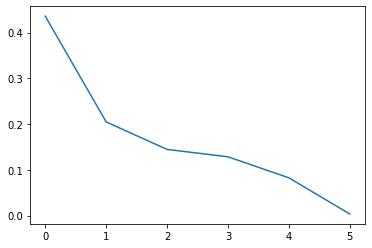

In [25]:
## Estimation, calcul des composantes principales
C_train = pca.fit(X_tot_train).transform(X_tot_train)[:,:5]
print(C_train.shape)

C_test = pca.fit(X_tot_test).transform(X_tot_test)[:,:5]

## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

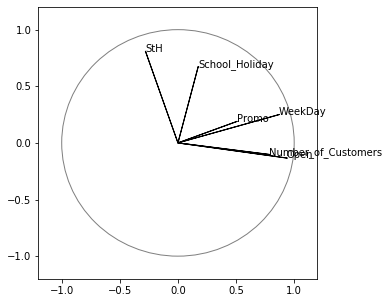

In [26]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
coord4=pca.components_[3]*np.sqrt(pca.explained_variance_[3])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH","Sales"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

In [27]:
coord1

array([ 0.87032985,  0.78436998,  0.93720136,  0.50651928,  0.17369212,
       -0.27864636])

Il est nécessaire de transformer les données car `scikit-learn` ne reconnaît pas la classe `DataFrame` de `pandas`, ce qui est bien dommage. Les variables qualitatives sont comme précédemment remplacées par les indicatrices de leurs modalités et les variables quantitatives conservées. Cela introduit une évidente redondance dans les données mais les procédures de sélection de modèle feront le tri.

Extraction des échantillons d'apprentissage et test.

On peut voir que quelquesoit la période de vacances a, b ou c, la direction des variables dans le plan principal est la même donc on la regroupe sous un boolean. De même, la variable ID ne represente aucune variance.

Cela a permis également de mieux représenter la variable School_Holiday.
On regarde maintenant si on peut encore regrouper nos points selon 2 groupes, représentés dans le plan principal

In [ ]:
X

In [ ]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=2)
clust.fit(X)
classe=clust.labels_

In [ ]:
## Repésentation des individus dans les coordonnées de l'acp.
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

# <FONT COLOR="Red">Deuxième partie: Prévision</font>

## Gaussian Process 

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]],df_train[["Sales"]],test_size=2/7,random_state=11)

In [ ]:
#df_train['Number_of_Customers']=scale(df_train['Number_of_Customers'])
#df_test['Number_of_Customers']=scale(df_test['Number_of_Customers'])

#X_train_2 = df_train[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]]
#y_train_2 = df_train[['Sales']]
#X_test_2 = df_test[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]]

##X_train_2['Number_of_Customers2'] = scale(X_train_2['Number_of_Customers'])
#Y_train = y_train_2
##X_test_2['Number_of_Customers'] = scale(X_test_2['Number_of_Customers'])

#X_train = X_train_2.values
#Y_train = Y_train.values.ravel()
#X_test = X_test_2.values
##Y_test = y_test_2.values.ravel()

#X_train[X_train == True] = 1
#X_train[X_train == False] = 0

#X_test[X_test == True] = 1
#X_test[X_test == False] = 0


In [89]:
Y_tot_train

array([7293, 7060, 4565, ..., 5823, 7986, 6565])

In [61]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()
#X_train_2['Number_of_Customers']=scale(X_train_2['Number_of_Customers'])
#df_train['Number_of_Customers']=scale(df_train['Number_of_Customers'])
#Y=y_train_2

In [62]:
i = 0
while i < 100:
    #df_sample = df_train.sample(7000)
    #gp.fit(df_sample[["WeekDay", "Number_of_Customers","Open","Promo","School_Holiday","StH"]], df_sample[["Sales"]])
    #batch
    gp.fit(C_train[i*7000:(i+1)*7000-1,:],Y_tot_train[i*7000:(i+1)*7000-1,])
    i+=1

In [67]:
C_test[-2:]

array([[ 1.02639981, -0.18612702,  1.0244413 , -0.4204325 , -0.21291868],
       [-0.10969596, -0.44470155, -0.34865917,  0.90193941, -0.73638813]])

In [64]:
y_predict = []
j=0
while len(y_predict) < len(C_test)-7000:
    y_tempo = gp.predict(C_test[j*7000:(j+1)*7000-1])
    j+=1
    for k in range(len(y_tempo)):
        y_predict.append(y_tempo[k])


In [72]:
y_tempo_f = gp.predict(C_test[-(len(C_test)-len(y_predict)):])

In [73]:
for k in range(len(y_tempo_f)):
    y_predict.append(y_tempo_f[k])

In [79]:
y_predict_v1 = y_predict

In [ ]:
for index, row in X_test_2[0:1].iterrows():
    r = pd.DataFrame(row)
r.transpose()

In [ ]:
# Prévision
#X_test_2['Number_of_Customers'] = scale(X_test_2['Number_of_Customers'])
y_chap = []
for i in range(len(X_test)):
    y_p = gp.predict(X_test[i])
    y_chap.append(y_p)

In [78]:
len(df_test['WeekDay'])

203444

In [80]:
list_weekday = list(df_test['WeekDay'])

In [81]:
for i in range(len(list_weekday)):
    if list_weekday[i]==False:
        y_predict[i]=0

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_chap, y_test_2))
print(RMSE)


In [84]:
np.savetxt("store_test.predict", y_predict,  fmt='%i')

In [83]:
C_test

array([[ 0.95772339, -0.17312376,  1.02436102, -0.41728943, -0.33592008],
       [ 0.14523924, -0.49297119, -0.34836114,  0.89027196, -0.27979205],
       [ 0.8734387 , -0.15716523,  1.02426248, -0.41343203, -0.48687633],
       ...,
       [ 0.07136006, -0.47898285, -0.34844751,  0.89365314, -0.41211173],
       [ 1.02639981, -0.18612702,  1.0244413 , -0.4204325 , -0.21291868],
       [-0.10969596, -0.44470155, -0.34865917,  0.90193941, -0.73638813]])

## Neural Network

In [ ]:
X_train_2['Number_of_Customers'] = scale(X_train_2['Number_of_Customers'])
Y_train = y_train_2
X_test_2['Number_of_Customers'] = scale(X_test_2['Number_of_Customers'])

X_train = X_train_2.values
Y_train = Y_train.values.ravel()
X_test = X_test_2.values
Y_test = y_test_2.values.ravel()

X_train[X_train == True] = 1
X_train[X_train == False] = 0

X_train = X_train[:20000]
Y_train = Y_train[:20000]

In [ ]:
X_train[X_train == True] = 1
X_train[X_train == False] = 0
X_test[X_test == True] = 1
X_test[X_test == False] = 0

In [ ]:
from sklearn.neural_network import MLPRegressor

myNN = MLPRegressor(hidden_layer_sizes=(8,16,8), activation='relu', 
                    solver='sgd', learning_rate_init=0.01, max_iter=2000)
#10M
#myNN = MLPRegressor(hidden_layer_sizes=(100,10), activation='logistic')
#18M
#myNN = MLPRegressor(hidden_layer_sizes=(1000,100), activation='logistic', solver='sgd', max_iter=2000)
#10M
#myNN = MLPRegressor(hidden_layer_sizes=(10,5), activation='logistic', solver='sgd', max_iter=10000, learning_rate='adaptive', n_iter_no_change=1e9)
#

In [ ]:
myNN.fit(X_train, Y_train)

In [ ]:
X_train[0]

In [ ]:
y_chap_nn = myNN.predict(X_test)
y_chap_nn

In [ ]:
list_weekday_nn = list(X_test_2['WeekDay'])
for i in range(len(list_weekday_nn)):
    if list_weekday_nn[i]==False:
        y_chap_nn[i]=0

In [ ]:
from sklearn.metrics import mean_squared_error
import math
RMSE = np.sqrt(mean_squared_error(y_chap_nn, y_test_2))
print(RMSE)


In [ ]:
len(X_test_2)

In [ ]:
y_test_2